# Data AGumentation to solve overfitting
* In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,cv2,PIL,pathlib
import tensorflow as tf
from tensorflow import keras

# Load flower dataset

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [7]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/2331651885_619653a5d3.jpg'),
 PosixPath('datasets/flower_photos/roses/14172324538_2147808483_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2300959680_8d22fa5ee2.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg'),
 PosixPath('datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg')]

In [8]:
image_dir =list(data_dir.glob('*/*.jpg'))
len(image_dir)

3670

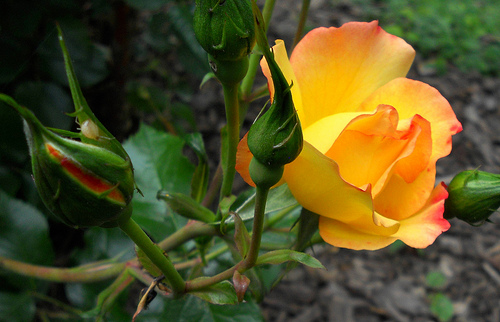

In [16]:
PIL.Image.open(image_dir[5])

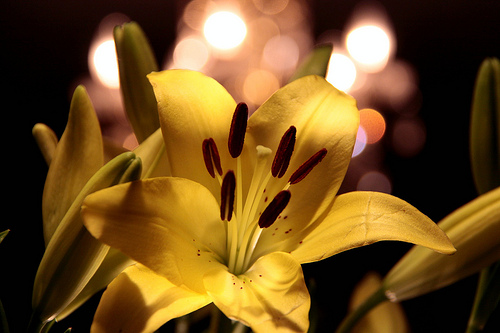

In [21]:

PIL.Image.open(image_dir[1233])

In [23]:
roses = list(data_dir.glob('roses/*'))

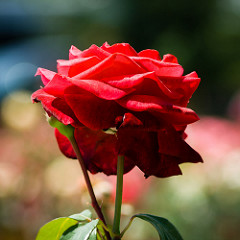

In [29]:
PIL.Image.open(roses[89])

In [9]:
flower_image_dictionary = {
    'roses':list(data_dir.glob('roses/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*'))
}

In [10]:
flower_image_dictionary

{'roses': [PosixPath('datasets/flower_photos/roses/2331651885_619653a5d3.jpg'),
  PosixPath('datasets/flower_photos/roses/14172324538_2147808483_n.jpg'),
  PosixPath('datasets/flower_photos/roses/2300959680_8d22fa5ee2.jpg'),
  PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg'),
  PosixPath('datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'),
  PosixPath('datasets/flower_photos/roses/7345657862_689366e79a.jpg'),
  PosixPath('datasets/flower_photos/roses/15255964274_cf2ecdf702.jpg'),
  PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
  PosixPath('datasets/flower_photos/roses/6363976189_e7155e5f9c.jpg'),
  PosixPath('datasets/flower_photos/roses/24781114_bc83aa811e_n.jpg'),
  PosixPath('datasets/flower_photos/roses/5402157745_a384f0583d_n.jpg'),
  PosixPath('datasets/flower_photos/roses/269037241_07fceff56a_m.jpg'),
  PosixPath('datasets/flower_photos/roses/12562723334_a2e0a9e3c8_n.jpg'),
  PosixPath('datasets/flower_photos/roses/6570546331_f

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

array([[[252, 252, 252],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 252, 252],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 252, 252],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 82,  44, 134],
        [ 80,  42, 132],
        [ 79,  41, 129],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 77,  39, 127],
        [ 75,  37, 125],
        [ 72,  37, 124],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 74,  36, 124],
        [ 70,  35, 121],
        [ 68,  33, 119],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
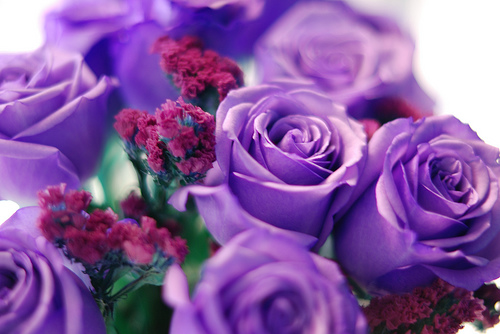

In [35]:
cv2.imread(str(flower_image_dictionary['roses'][0]))

array([[[ 74, 112, 146],
        [ 74, 113, 145],
        [ 72, 112, 141],
        ...,
        [ 30,  19,  75],
        [ 28,  24,  73],
        [ 30,  28,  74]],

       [[ 75, 113, 147],
        [ 75, 113, 147],
        [ 75, 113, 143],
        ...,
        [ 27,  13,  71],
        [ 26,  17,  68],
        [ 27,  21,  68]],

       [[ 77, 114, 148],
        [ 77, 114, 148],
        [ 76, 113, 147],
        ...,
        [ 28,   7,  70],
        [ 25,  11,  65],
        [ 26,  15,  65]],

       ...,

       [[ 38, 114, 137],
        [ 24,  99, 121],
        [ 20,  95, 111],
        ...,
        [155,  49, 148],
        [158,  64, 153],
        [160,  72, 156]],

       [[ 31, 117, 137],
        [ 18, 100, 117],
        [ 11,  93, 105],
        ...,
        [148,  51, 145],
        [149,  62, 148],
        [148,  69, 148]],

       [[ 30, 116, 134],
        [ 12,  99, 115],
        [  6,  90, 102],
        ...,
        [141,  51, 141],
        [139,  60, 141],
        [136,  64, 140]]], dtype=uint8)
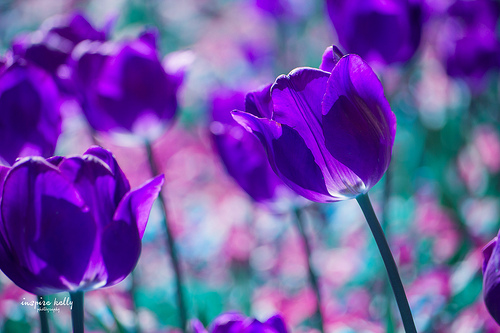

In [36]:
cv2.imread(str(flower_image_dictionary['tulips'][0]))

In [11]:
x,y = [],[]
for flower_name,image_data in flower_image_dictionary.items():
    for image in image_data:
        img =cv2.imread(str(image))
        resize_img =cv2.resize(img,(180,180))
        x.append(resize_img)
        y.append(flowers_labels_dict[flower_name])



array([[[253, 253, 253],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 253, 253],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 93,  52, 144],
        [ 81,  44, 134],
        [ 77,  42, 129],
        ...,
        [251, 254, 252],
        [254, 254, 254],
        [254, 254, 254]],

       [[ 82,  43, 134],
        [ 76,  40, 127],
        [ 74,  39, 124],
        ...,
        [254, 254, 253],
        [254, 254, 253],
        [255, 255, 255]],

       [[ 72,  36, 123],
        [ 69,  34, 119],
        [ 72,  38, 122],
        ...,
        [254, 254, 254],
        [252, 254, 254],
        [255, 255, 255]]], dtype=uint8)
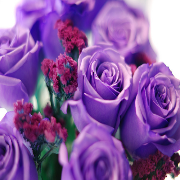

In [49]:
x[0]


* conveting the x and y into array and scling the data between 0 to 1 to convert the rgb pixles inot proper frmat

In [12]:
x = np.array(x)
y =np.array(y)

In [13]:
x = x/255


In [59]:
x[0]

array([[[0.99215686, 0.99215686, 0.99215686],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.36470588, 0.20392157, 0.56470588],
        [0.31764706, 0.17254902, 0.5254902 ],
        [0.30196078, 0

# Train test Spllit

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =2311,test_size =0.25)


In [18]:
# building a Model
import tensorflow as tf
from tensorflow.keras import layers
from keras import Sequential

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(metrics =['accuracy'],optimizer ='adam',loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.fit(x_train,y_train,batch_size =19,epochs =16)


In [17]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 7s 229ms/step - loss: 2.3622 - accuracy: 0.6580


[2.362243175506592, 0.657952070236206]

* the Training accuracy is so high of around 0.993 %
* But the testing accuracy is small 0.65%

In [18]:
predictions = model.predict(x_test)
predictions

29/29 [==============================] - 8s 257ms/step


array([[ -3.5299675,  -3.1024048,   2.4845898,  -2.5190666,   3.8688786],
       [  0.5963878,   0.6723079,   5.491919 , -11.17926  ,  -2.9876246],
       [ -7.757057 ,  -9.102648 ,   0.3028378,  17.179642 ,   3.584289 ],
       ...,
       [ 11.211044 ,  -8.464763 ,  -6.188202 ,  -8.05287  ,   7.6060443],
       [-11.501362 , -15.846588 ,  11.160599 ,  15.640642 ,   4.1265535],
       [ -0.4717674,  -3.4610682,  -2.3665862,  14.535921 ,  -3.8944705]],
      dtype=float32)

In [20]:
predictions[0]

array([-3.5299675, -3.1024048,  2.4845898, -2.5190666,  3.8688786],
      dtype=float32)

In [19]:
np.argmax(predictions[0])

4

In [34]:
flowers_labels_dict # dandelions

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [35]:
y_test[0]

2

* Our model is predcting the image as tulips while the actual image is dandelions
* BEcause of the overfitting ,this occurs

array([[[0.58823529, 0.40784314, 0.28235294],
        [0.46666667, 0.34117647, 0.21960784],
        [0.25490196, 0.19607843, 0.10980392],
        ...,
        [0.0627451 , 0.06666667, 0.0627451 ],
        [0.01176471, 0.03529412, 0.03137255],
        [0.05490196, 0.05490196, 0.08235294]],

       [[0.67843137, 0.4627451 , 0.35294118],
        [0.60784314, 0.44705882, 0.32156863],
        [0.35686275, 0.25490196, 0.15294118],
        ...,
        [0.03137255, 0.05098039, 0.07058824],
        [0.05490196, 0.0745098 , 0.05490196],
        [0.04705882, 0.06666667, 0.09019608]],

       [[0.6745098 , 0.48235294, 0.37254902],
        [0.60392157, 0.45098039, 0.32941176],
        [0.44313725, 0.31372549, 0.18823529],
        ...,
        [0.03137255, 0.08627451, 0.13333333],
        [0.04313725, 0.03921569, 0.01176471],
        [0.05882353, 0.07843137, 0.09803922]],

       ...,

       [[0.17254902, 0.33333333, 0.3254902 ],
        [0.25882353, 0.43137255, 0.43921569],
        [0.43921569, 0

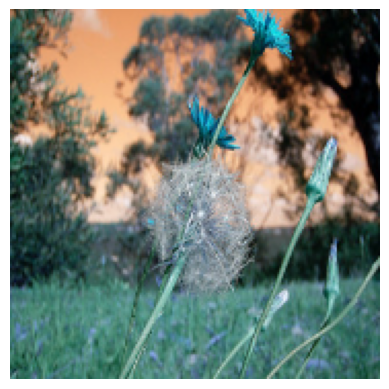

In [38]:
plt.axis('off')
plt.imshow(x_test[0])


# Data Agumenation

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

* orginal image

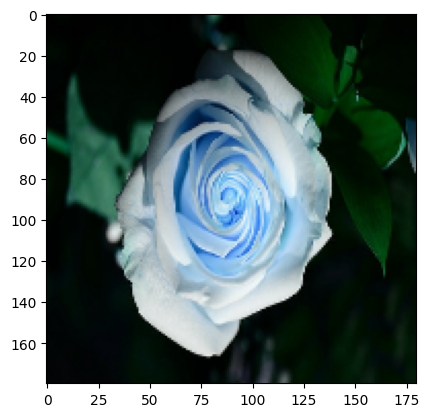

In [15]:
# plt.axis('off')
plt.imshow(x[23])


* Newely genetared image using data Agumentation

In [ ]:
# plt.axis('off')
plt.imshow(data_augmentation(x)[23].numpy().astype("uint8"))

* Creating a model using DAta agumentation

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)


In [ ]:
model.evaluate(X_test_scaled,y_test)